In [4]:
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
train = pd.read_csv("C:/Users/user/Desktop//kaggle/train.csv")
test = pd.read_csv("C:/Users/user/Desktop/kaggle/test.csv")
submit = pd.read_csv("C:/Users/user/Desktop/kaggle/gender_submission.csv")

In [6]:
test.info()
data = train.append(test)
data
data.reset_index(
    inplace = True,
    drop = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


C:\Users\user\Anaconda3\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


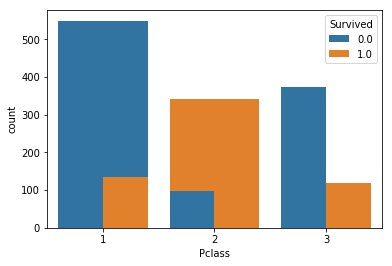

In [7]:
%matplotlib inline
sns.countplot(data["Survived"])
sns.countplot(data["Pclass"],hue = data["Survived"])

C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


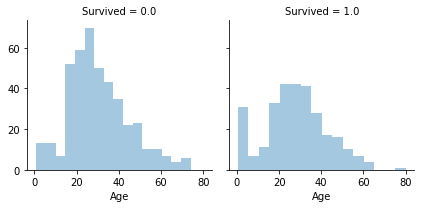

In [8]:
g = sns.FacetGrid(data,col = 'Survived')
g.map(sns.distplot,'Age',kde = False)

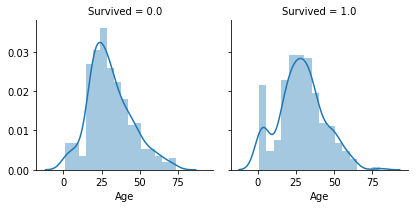

In [9]:
g = sns.FacetGrid(data,col = 'Survived')
g.map(sns.distplot,'Age',kde = True)

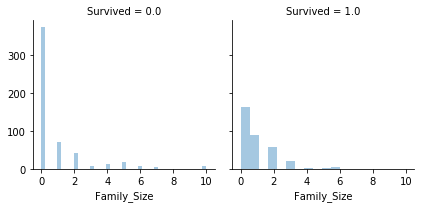

In [10]:
data['Family_Size'] = data['Parch']+data['SibSp']
g = sns.FacetGrid(data,col = 'Survived')
g.map(sns.distplot,'Family_Size',kde = False)

In [11]:
data['Title1'] = data['Name'].str.split(", ",expand = True)[1]
data['Title1'].head(3)

0                               Mr. Owen Harris
1    Mrs. John Bradley (Florence Briggs Thayer)
2                                   Miss. Laina
Name: Title1, dtype: object

In [12]:
data['Title1'] = data['Title1'].str.split(".",expand = True)[0]
data['Title1'].head(3)

0      Mr
1     Mrs
2    Miss
Name: Title1, dtype: object

In [13]:
data['Title1'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [14]:
pd.crosstab(data['Title1'],
           data['Sex']).T.style.background_gradient(cmap = 'summer_r')

Title1,Capt,Col,Don,Dona,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Sex,,,,,,,,,,,,,,,,,,
female,0,0,0,1,1,0,1,0,0,260,2,1,0,197,2,0,0,1
male,1,4,1,0,7,1,0,2,61,0,0,0,757,0,0,8,1,0


In [15]:
data['Title2'] = data['Title1'].replace(['Mlle','Mme','Ms','Dr','Major','Lady',
                                         'the Countess','jonkheer','Col','Rev',
                                         'Capt','Sir','Don','Dona'],
                                       ['Miss','Mrs','Miss','Mr','Mr','Mrs',
                                        'Mrs','Mr','Mr','Mr','Mr','Mr','Mr',
                                        'Mrs'])
data["Title2"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Jonkheer'], dtype=object)

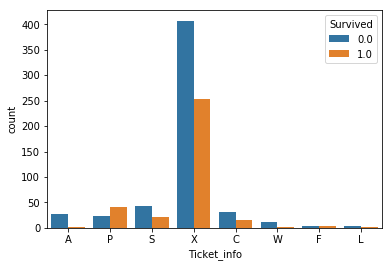

In [16]:
data["Ticket_info"] = data["Ticket"].apply(lambda x :
                                          x.replace(".","").replace("/","").strip(" ")[0] if
                                          not x.isdigit() else "X")
data["Ticket_info"].unique()
sns.countplot(data["Ticket_info"],hue = data["Survived"])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 16 columns):
Age            1046 non-null float64
Cabin          1309 non-null object
Embarked       1309 non-null object
Fare           1309 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
Family_Size    1309 non-null int64
Title1         1309 non-null object
Title2         1309 non-null object
Ticket_info    1309 non-null object
dtypes: float64(3), int64(5), object(8)
memory usage: 163.7+ KB


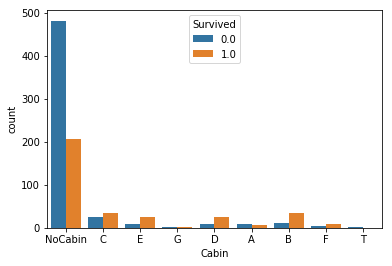

In [17]:
data['Embarked'] = data['Embarked'].fillna('S')
data['Fare'] = data['Fare'].fillna(data['Fare'].mean())
data['Cabin'].head(10)
data["Cabin"] = data['Cabin'].apply(lambda x: str(x) [0] if not pd.isnull(x)
                                    else 'NoCabin')
data["Cabin"].unique()
sns.countplot(data['Cabin'], hue=data['Survived'])
data.info()

In [18]:
data["Sex"] = data["Sex"].astype("category").cat.codes
data["Embarked"] = data["Embarked"].astype("category").cat.codes
data["Pclass"] = data["Pclass"].astype("category").cat.codes
data["Title1"] = data["Title1"].astype("category").cat.codes
data["Title2"] = data["Title2"].astype("category").cat.codes
data["Cabin"] = data["Cabin"].astype("category").cat.codes
data["Ticket_info"] = data["Ticket_info"].astype("category").cat.codes

outlier = 離群值 = > 4個標準差 | = 或

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
dataAgeNull = data[data["Age"].isnull()]
dataAgeNotNull = data[data["Age"].notnull()]
remove_outlier = dataAgeNotNull[(np.abs(dataAgeNotNull["Fare"]-
        dataAgeNotNull["Fare"].mean())>(4*dataAgeNotNull["Fare"].std())) |
                               (np.abs(dataAgeNotNull["Family_Size"]-
  dataAgeNotNull["Family_Size"].mean())>(4*dataAgeNotNull["Family_Size"].std()))
                               ]
rfModel_age = RandomForestRegressor(n_estimators = 2000, random_state=42)
ageColumns = ['Embarked','Fare','Pclass','Sex','Family_Size','Title1','Title2',
              'Cabin','Ticket_info']
rfModel_age.fit(remove_outlier [ageColumns], remove_outlier ["Age"])

ageNullValues = rfModel_age.predict (X= dataAgeNull[ageColumns])
dataAgeNull.loc [: ,"Age"] = ageNullValues
data = dataAgeNull.append(dataAgeNotNull)
data.reset_index(inplace = True, drop = True)

C:\Users\user\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
